In [10]:
import pandas as pd
import ssl
import time
import datetime

def get_df(addr):
    ssl._create_default_https_context = ssl._create_unverified_context
    transactions_url = 'https://blockchain.info/rawaddr/' + addr
    df = pd.read_json(transactions_url)
    time.sleep(10)
    return df

def find_transactions(df): 
    transactions = df['txs']
    return transactions 

def find_inputaddr(df):
    transactions = find_transactions(df) 
    inputaddrs = []
    for transaction in transactions:
        inputaddrs.append(transaction['inputs'][0]['prev_out']['addr'])
    return inputaddrs

def find_outputaddr(df):
    transactions = find_transactions(df) 
    outputaddrs = []
    for transaction in transactions:
        outputaddrs.append(transaction['out'][0]['addr'])
    return outputaddrs

def find_amounts(df):
    transactions = find_transactions(df)
    amounts = []
    for transaction in transactions:
        amounts.append(transaction['result'])
    return amounts

def find_time(df):
    transactions = find_transactions(df)
    times = []
    for transaction in transactions:
        time = transaction['time']
        dt = datetime.datetime.fromtimestamp(time)
        dt_format = dt.strftime("%Y-%m-%d %H:%M:%S")
        times.append(dt_format)
    return times

def get_dataframe(inputaddrs,outputaddrs,amounts,times):
    data = {'input_address': inputaddrs,
            'transactions': outputaddrs,
            'amount': amounts,
            'time_of_transaction':times,
           }
    dataframe = pd.DataFrame(data)
    return dataframe

def get_total_transactions(addr):
    df = get_df(addr)
    inputaddrs = find_inputaddr(df)
    outputaddrs = find_outputaddr(df)
    amounts = find_amounts(df)
    times = find_time(df)
    
    dataframe = get_dataframe(inputaddrs,outputaddrs,amounts,times)
    print(f'Dataframe is set')
    return dataframe

In [11]:
'''
Defining Matplotlib function for plotting
'''
import textwrap
from matplotlib import pyplot as plt
from matplotlib.patches import FancyArrowPatch

## improving the plot quality
plt.rcParams['figure.dpi'] = 1200
plt.rcParams['savefig.dpi'] = 1200

def plot_n_transactions(dataframe,n_txns,addr):
    sending_rectangle = plt.Rectangle((3, 3), width = 4, height = 2, 
                                      facecolor = 'gainsboro', 
                                      edgecolor = 'black')
    plt.annotate(textwrap.fill(addr,width=17), ((0)*7+5, 4), 
                 horizontalalignment = 'center',
                 verticalalignment = 'center',
                 fontsize = 8)
    ax = plt.gca()
    for n in range(n_txns):
        rect = plt.Rectangle((10, (n)*3+3), width = 4, height = 2, 
                             facecolor = 'gainsboro', 
                             edgecolor = 'black')
        arrow = FancyArrowPatch((7, 4), (10, 3*(n)+4), 
                                edgecolor = 'lightgray', 
                                arrowstyle = 'simple',
                                mutation_scale = 10,
                                connectionstyle = 'angle3')
        plt.annotate(str(dataframe['amount'][n]/(10**8)) + ' BTC',
                     (7.1, 4.5+3*(n)), 
                     fontsize = 8)
        plt.annotate(textwrap.fill(dataframe['transactions'][n],width = 17),
                     (12, 4+3*(n)),
                     horizontalalignment = 'center',
                     verticalalignment = 'center',
                     fontsize = 8)
        ax.add_patch(rect)
        ax.add_patch(arrow)  
        
    ax.add_patch(sending_rectangle)
    plt.axis("scaled")
    plt.axis("off")
    plt.show()

In [7]:
## show generated Pandas Dataframe
addr = '1qh4RVaUHC1qkYUotCnvPpJSZQByVW4S7'
dataframe = get_total_transactions(addr)
dataframe

Dataframe is set


input_address  \
0                  1BAd4Js8GsaZ1LD4MwGGnfRefLcjAWNmHp   
1                   1qh4RVaUHC1qkYUotCnvPpJSZQByVW4S7   
2                   1qh4RVaUHC1qkYUotCnvPpJSZQByVW4S7   
3                   1qh4RVaUHC1qkYUotCnvPpJSZQByVW4S7   
4                   1qh4RVaUHC1qkYUotCnvPpJSZQByVW4S7   
5                   1qh4RVaUHC1qkYUotCnvPpJSZQByVW4S7   
6                   1qh4RVaUHC1qkYUotCnvPpJSZQByVW4S7   
7                   1qh4RVaUHC1qkYUotCnvPpJSZQByVW4S7   
8                   1qh4RVaUHC1qkYUotCnvPpJSZQByVW4S7   
9                   1qh4RVaUHC1qkYUotCnvPpJSZQByVW4S7   
10                  1qh4RVaUHC1qkYUotCnvPpJSZQByVW4S7   
11                  1qh4RVaUHC1qkYUotCnvPpJSZQByVW4S7   
12                  1qh4RVaUHC1qkYUotCnvPpJSZQByVW4S7   
13                  1qh4RVaUHC1qkYUotCnvPpJSZQByVW4S7   
14                  1qh4RVaUHC1qkYUotCnvPpJSZQByVW4S7   
15                  1qh4RVaUHC1qkYUotCnvPpJSZQByVW4S7   
16                  1qh4RVaUHC1qkYUotCnvPpJSZQByVW4S7   
17                  1qh4RVaUHC1qkYUotCnvPpJSZQByVW4S7   
18                  1qh4RVaUHC1qkYUotCnvPpJSZQByVW4S7   
19                  1qh4RVaUHC1qkYUotCnvPpJSZQByVW4S7   
20                  1qh4RVaUHC1qkYUotCnvPpJSZQByVW4S7   
21                  1qh4RVaUHC1qkYUotCnvPpJSZQByVW4S7   
22                  1qh4RVaUHC1qkYUotCnvPpJSZQByVW4S7   
23                  1qh4RVaUHC1qkYUotCnvPpJSZQByVW4S7   
24                  1qh4RVaUHC1qkYUotCnvPpJSZQByVW4S7   
25                  1qh4RVaUHC1qkYUotCnvPpJSZQByVW4S7   
26                  1qh4RVaUHC1qkYUotCnvPpJSZQByVW4S7   
27                  1qh4RVaUHC1qkYUotCnvPpJSZQByVW4S7   
28                  1qh4RVaUHC1qkYUotCnvPpJSZQByVW4S7   
29                  1qh4RVaUHC1qkYUotCnvPpJSZQByVW4S7   
30                  1qh4RVaUHC1qkYUotCnvPpJSZQByVW4S7   
31                  1qh4RVaUHC1qkYUotCnvPpJSZQByVW4S7   
32                  1qh4RVaUHC1qkYUotCnvPpJSZQByVW4S7   
33                  1qh4RVaUHC1qkYUotCnvPpJSZQByVW4S7   
34                  1qh4RVaUHC1qkYUotCnvPpJSZQByVW4S7   
35                  1qh4RVaUHC1qkYUotCnvPpJSZQByVW4S7   
36                  1qh4RVaUHC1qkYUotCnvPpJSZQByVW4S7   
37                  1qh4RVaUHC1qkYUotCnvPpJSZQByVW4S7   
38                  1qh4RVaUHC1qkYUotCnvPpJSZQByVW4S7   
39                  1qh4RVaUHC1qkYUotCnvPpJSZQByVW4S7   
40                  1qh4RVaUHC1qkYUotCnvPpJSZQByVW4S7   
41  bc1q8jxgyj0ewv7ukrzkc3wlgm4nu5epen9alrhkj9a8su...   

                                  transactions   amount  time_of_transaction  
0           1BAd4Js8GsaZ1LD4MwGGnfRefLcjAWNmHp   -47000  2023-01-05 13:05:03  
1           12YdJHWTgiUZ8AWHujMQ3Ycg5uyXFPvgX8   -39134  2022-12-28 16:15:25  
2           3CBofv2RXSeweTZGjqY4RSLdhoEHvAmP2z   -27766  2022-12-28 16:02:25  
3            18Vemn3r58s8Vnoow81bhFwfEmnmxX8rJ   -35832  2022-12-22 15:01:11  
4   bc1q6naqzxcg3qfyh9rkan70g0avgz4vhhqprfhfsu   -58280  2022-12-13 15:39:00  
5           39oq6PmMpKnr1EPmUw5EM4qmtwG3LMpMfv   -38188  2022-12-12 18:58:50  
6           1LVDkd6JgQ8Hz6Z9uPDqpeovvST6dbKSX2   -31930  2022-12-12 17:13:10  
7   bc1q0wm4mh5nydpnvyqp8p6txptwrgkk6scu25ug6a   -65888  2022-12-12 16:57:36  
8           3FpJ5xjExQQdHo3q8HGex5TbEyuJ7aph5Y  -119382  2022-12-06 18:40:43  
9           13EEkeKu2ggPSsqPopnKP4YydJkpGxAvd3   -41358  2022-12-05 14:05:12  
10          3CDdMg3Xzi8XDxCS4c8sFqds7YUVMSM2Gu  -138269  2022-12-05 14:03:06  
11          3AnMrz1HLVbJ7XswpJBABXxKkb2oEUyWuM   -72519  2022-12-01 18:23:15  
12          16V68CnNuePwh9VN7EuMzgWNtA92zYg53T  -123654  2022-12-01 17:08:52  
13          17ubREkJQk1vBwRrE3gMFkXeuw5f33iU2i   -43020  2022-11-30 17:51:40  
14  bc1qlauqkxxfukxhvy4myc7t5vhfel38vs6d5rqxtr   -71280  2022-11-30 17:47:25  
15          19vzzNuuCVGyjamtBvbH6M9dkfpWHJMvJp   -37900  2022-11-28 14:24:55  
16          1LtsnK7NvzJz6G3849FQ2LWM6wQdf8S54T   -37864  2022-11-28 14:23:44  
17  bc1qaw8tl4znzytwju6ejhzp6ah80cf7pj66wd74cj  -608436  2022-11-25 15:41:05  
18          13nsDabnQHBQ6EgCCppmtpseTWfHoSrjnY   -69000  2022-11-21 16:07:39  
19      

Dataframe is set


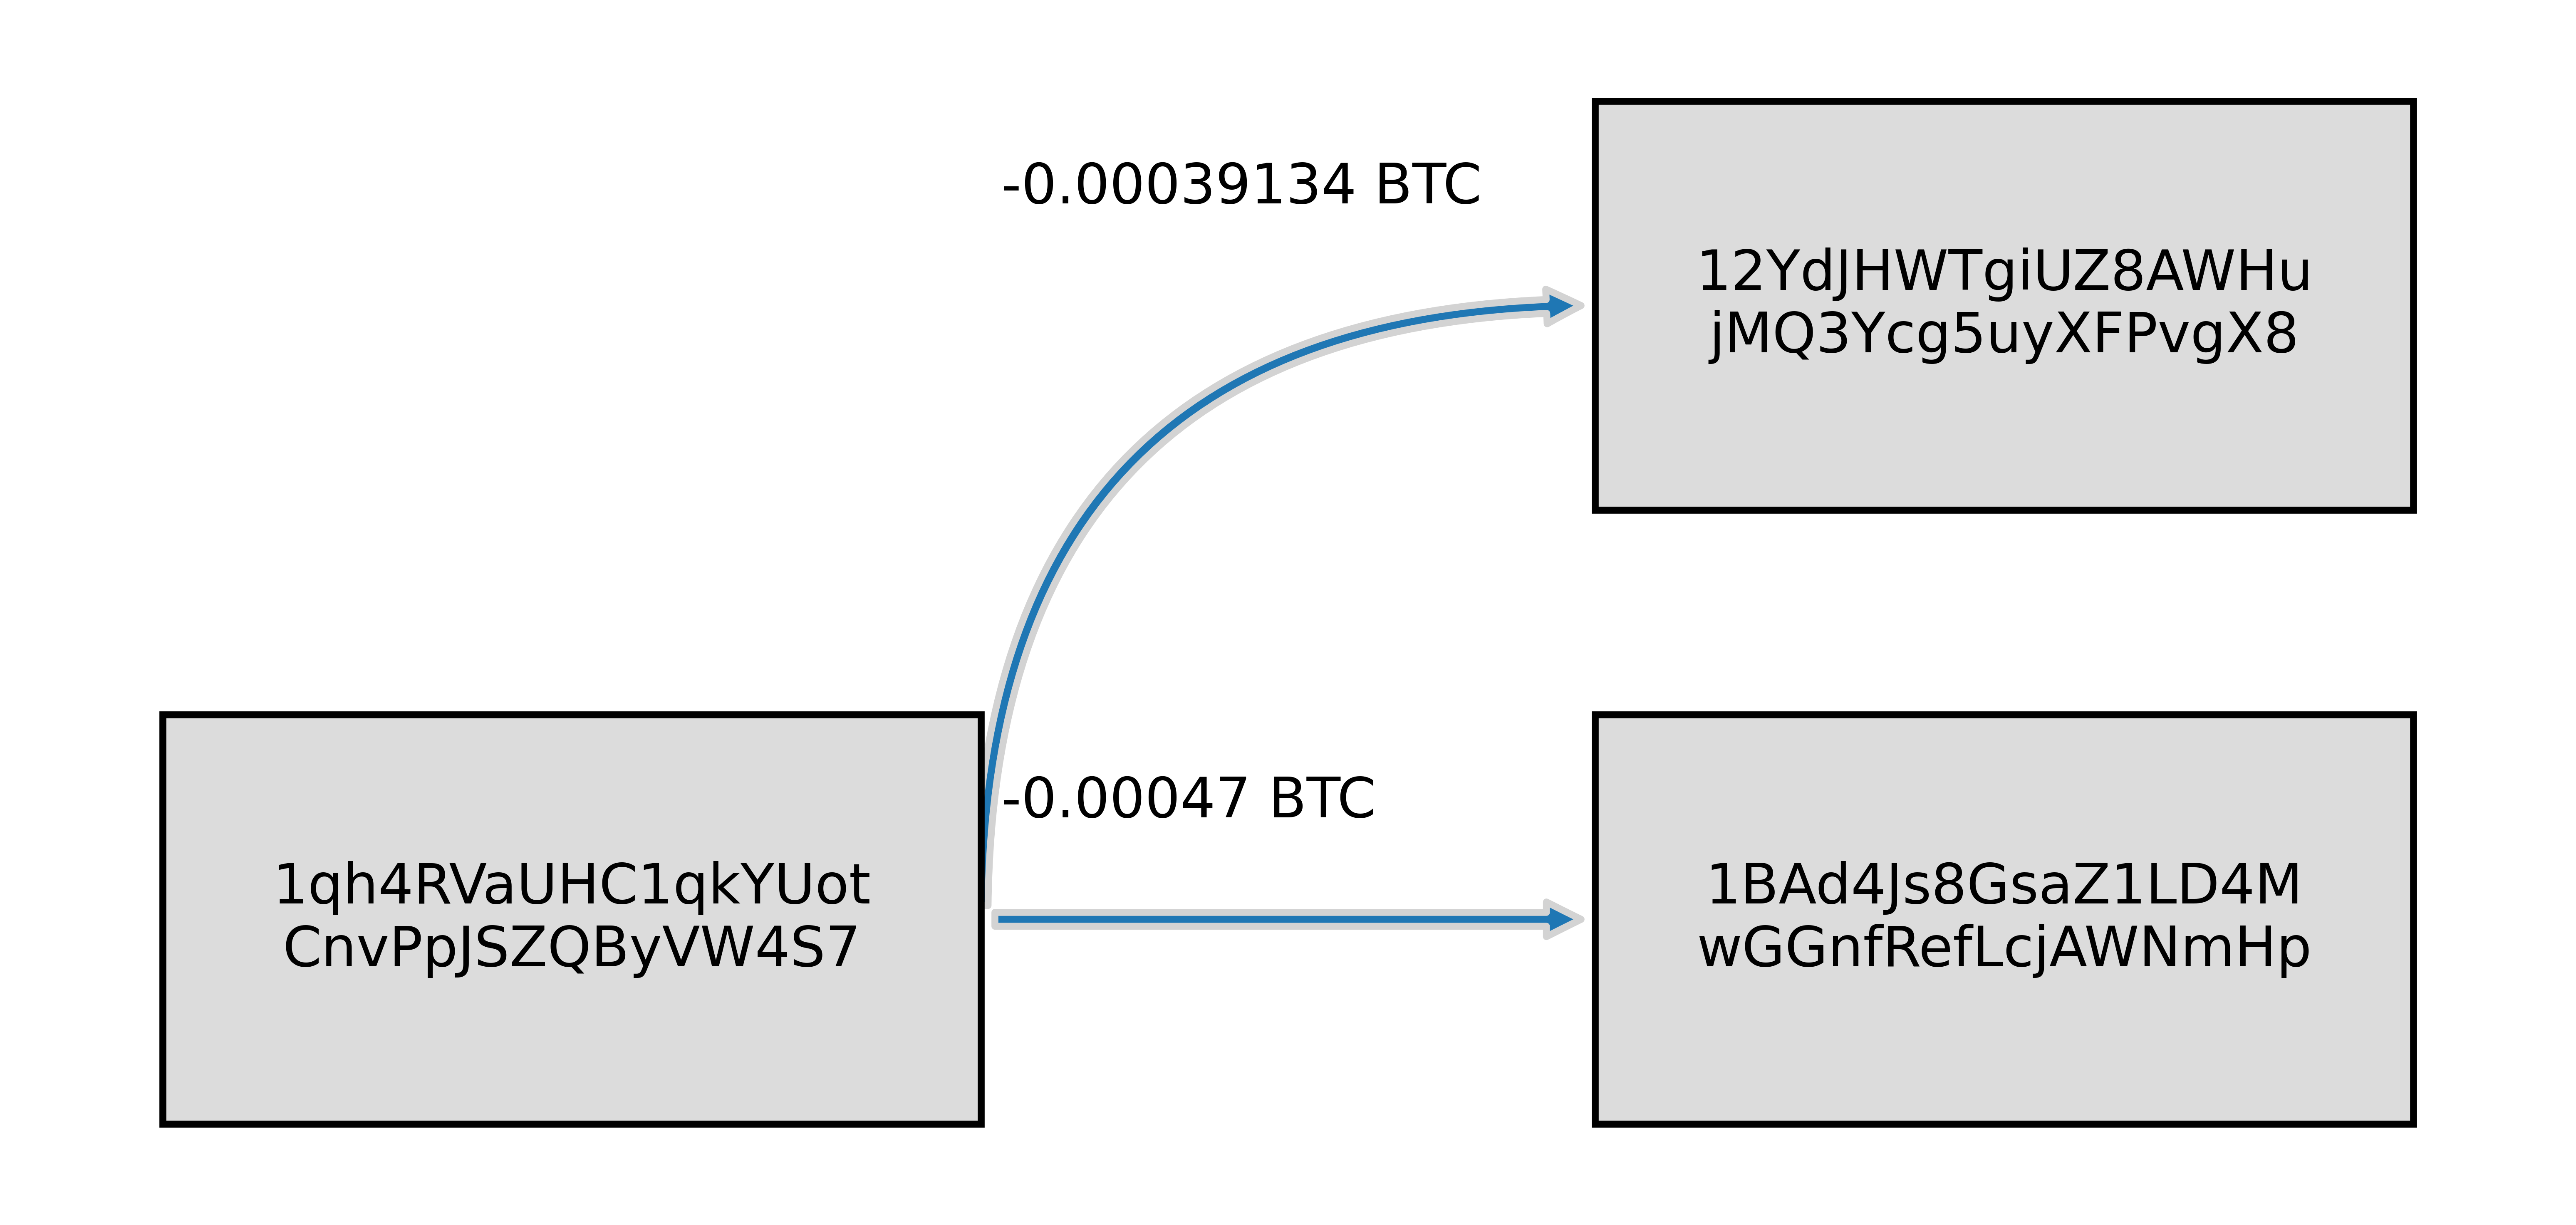

In [3]:
## Test case 1: Bitcoin address with 2 output addresses and amounts
addr = '1qh4RVaUHC1qkYUotCnvPpJSZQByVW4S7'
numoftransactions = 2

dataframe = get_total_transactions(addr)
plot_n_transactions(dataframe,numoftransactions,addr)

Dataframe is set


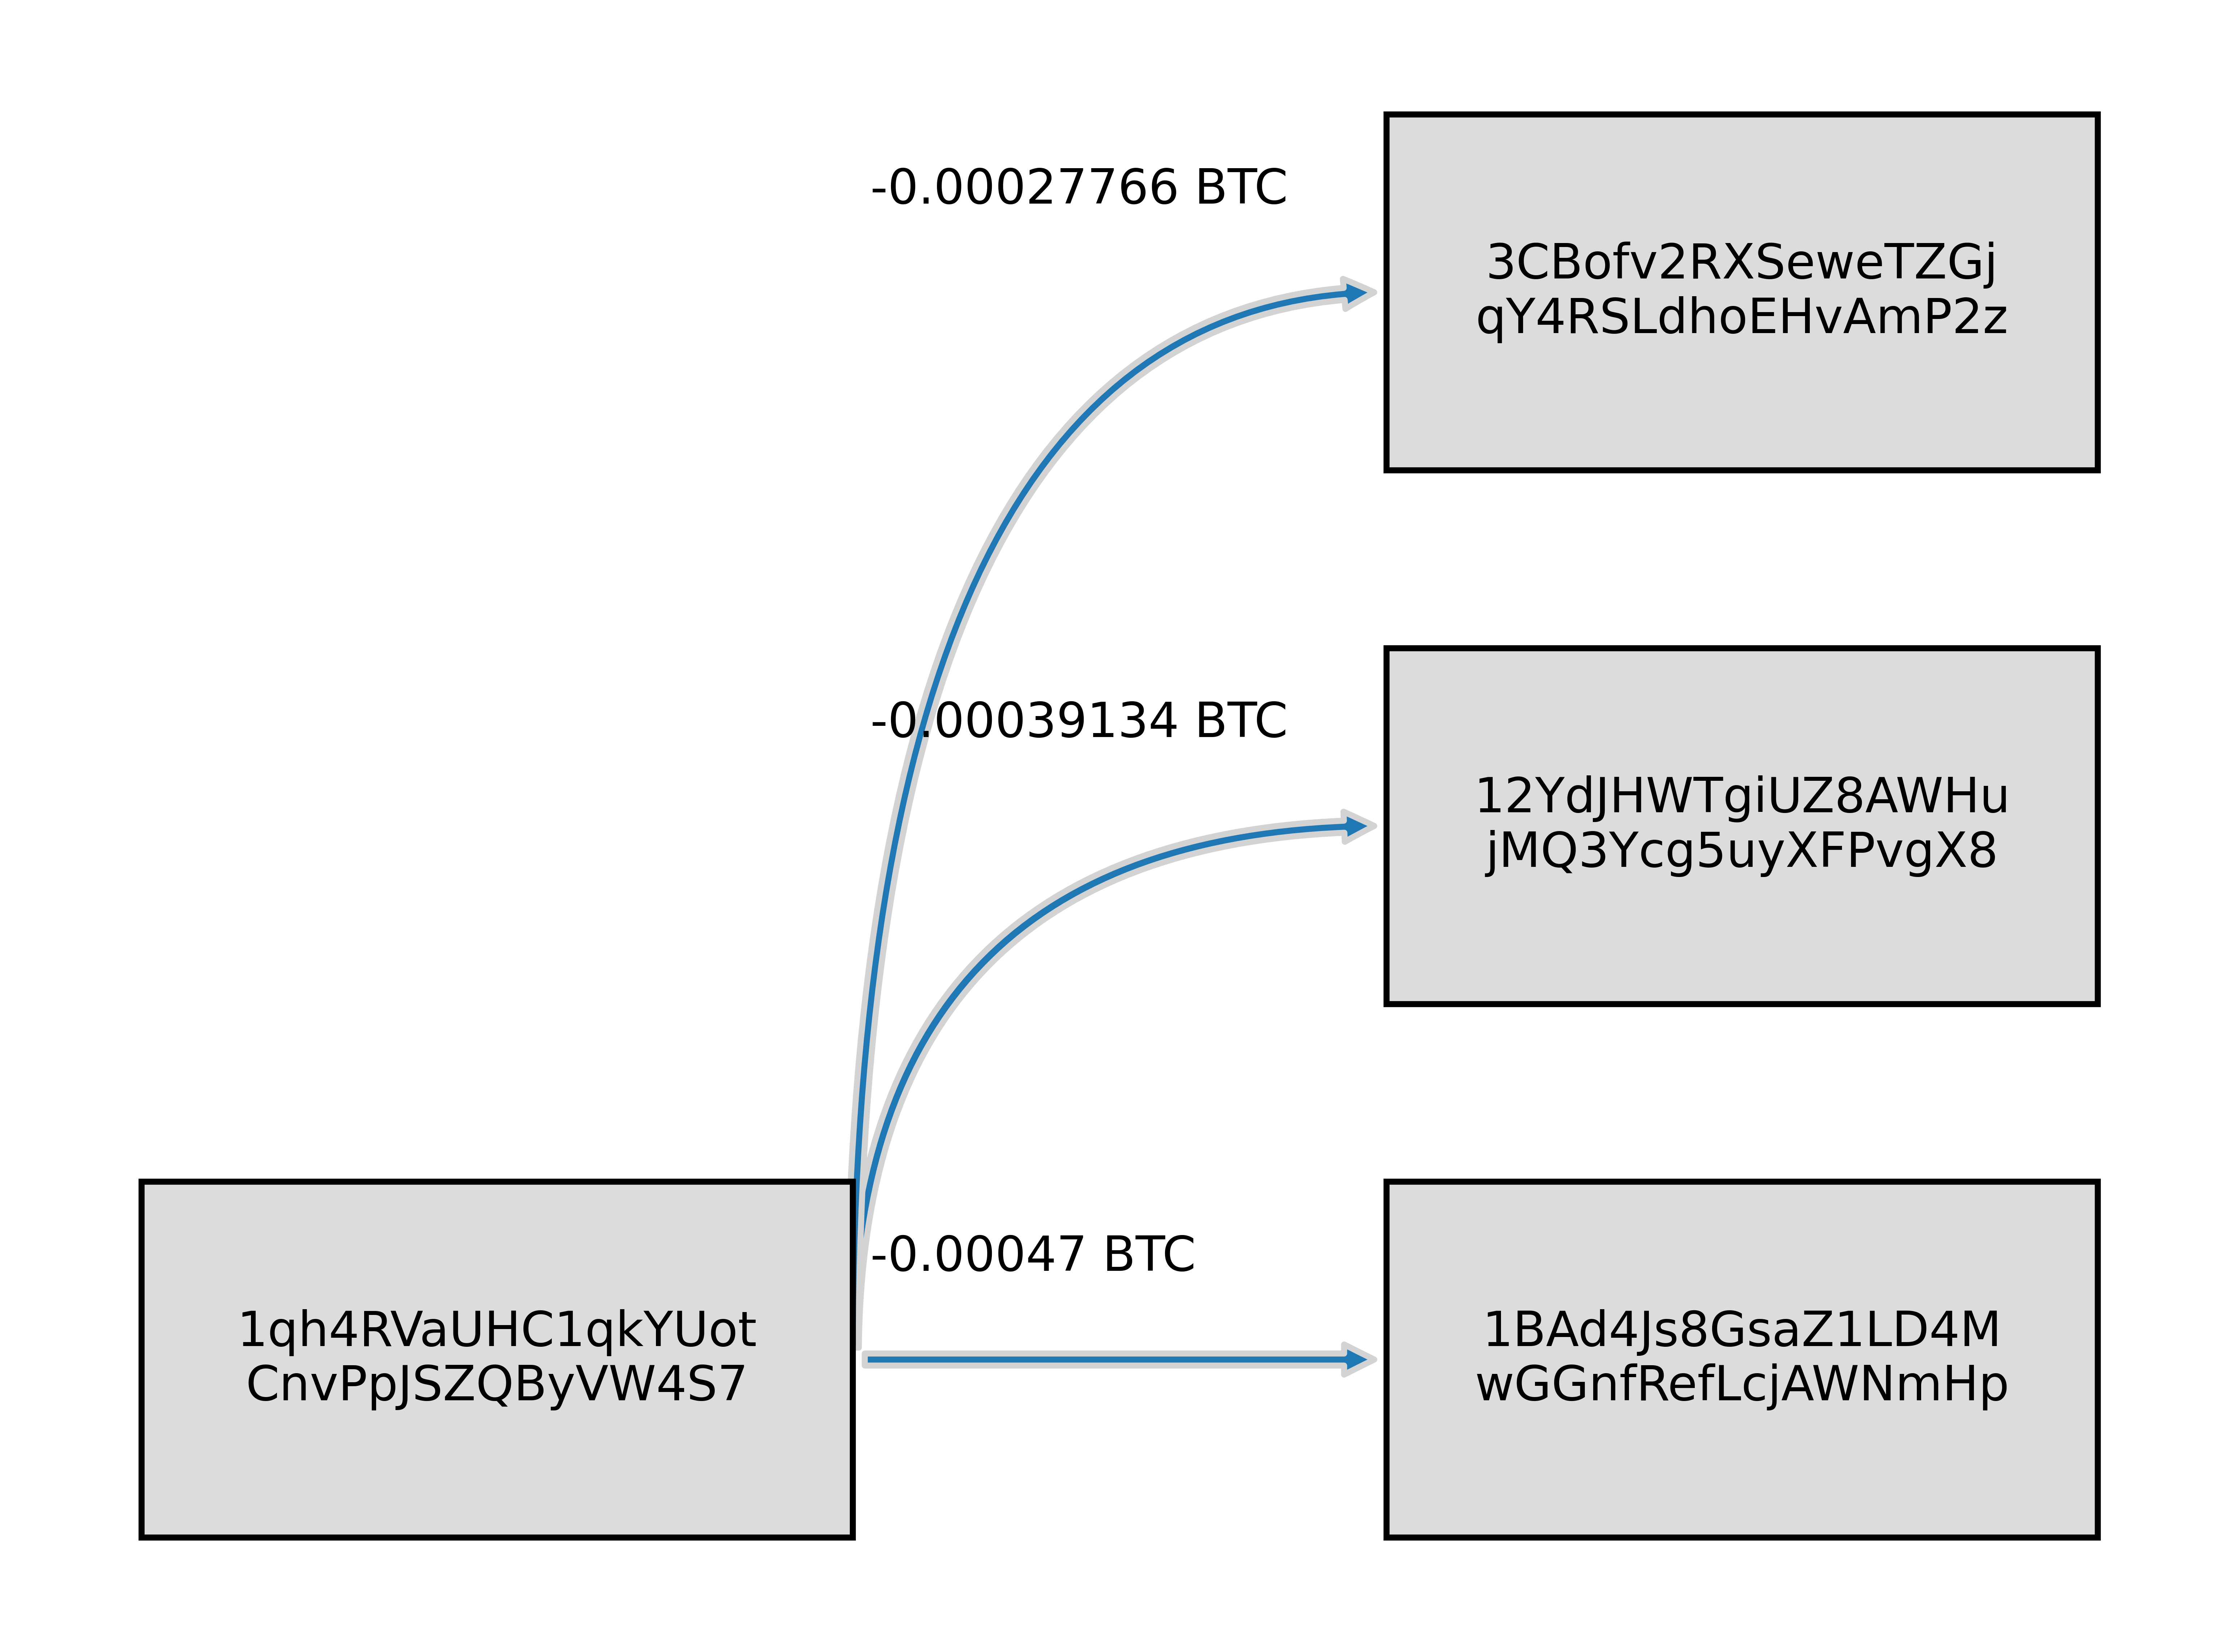

In [4]:
## Test case 2: Bitcoin address with 3 output addresses
addr = '1qh4RVaUHC1qkYUotCnvPpJSZQByVW4S7'
numoftransactions = 3

dataframe = get_total_transactions(addr)
plot_n_transactions(dataframe,numoftransactions,addr)

Dataframe is set


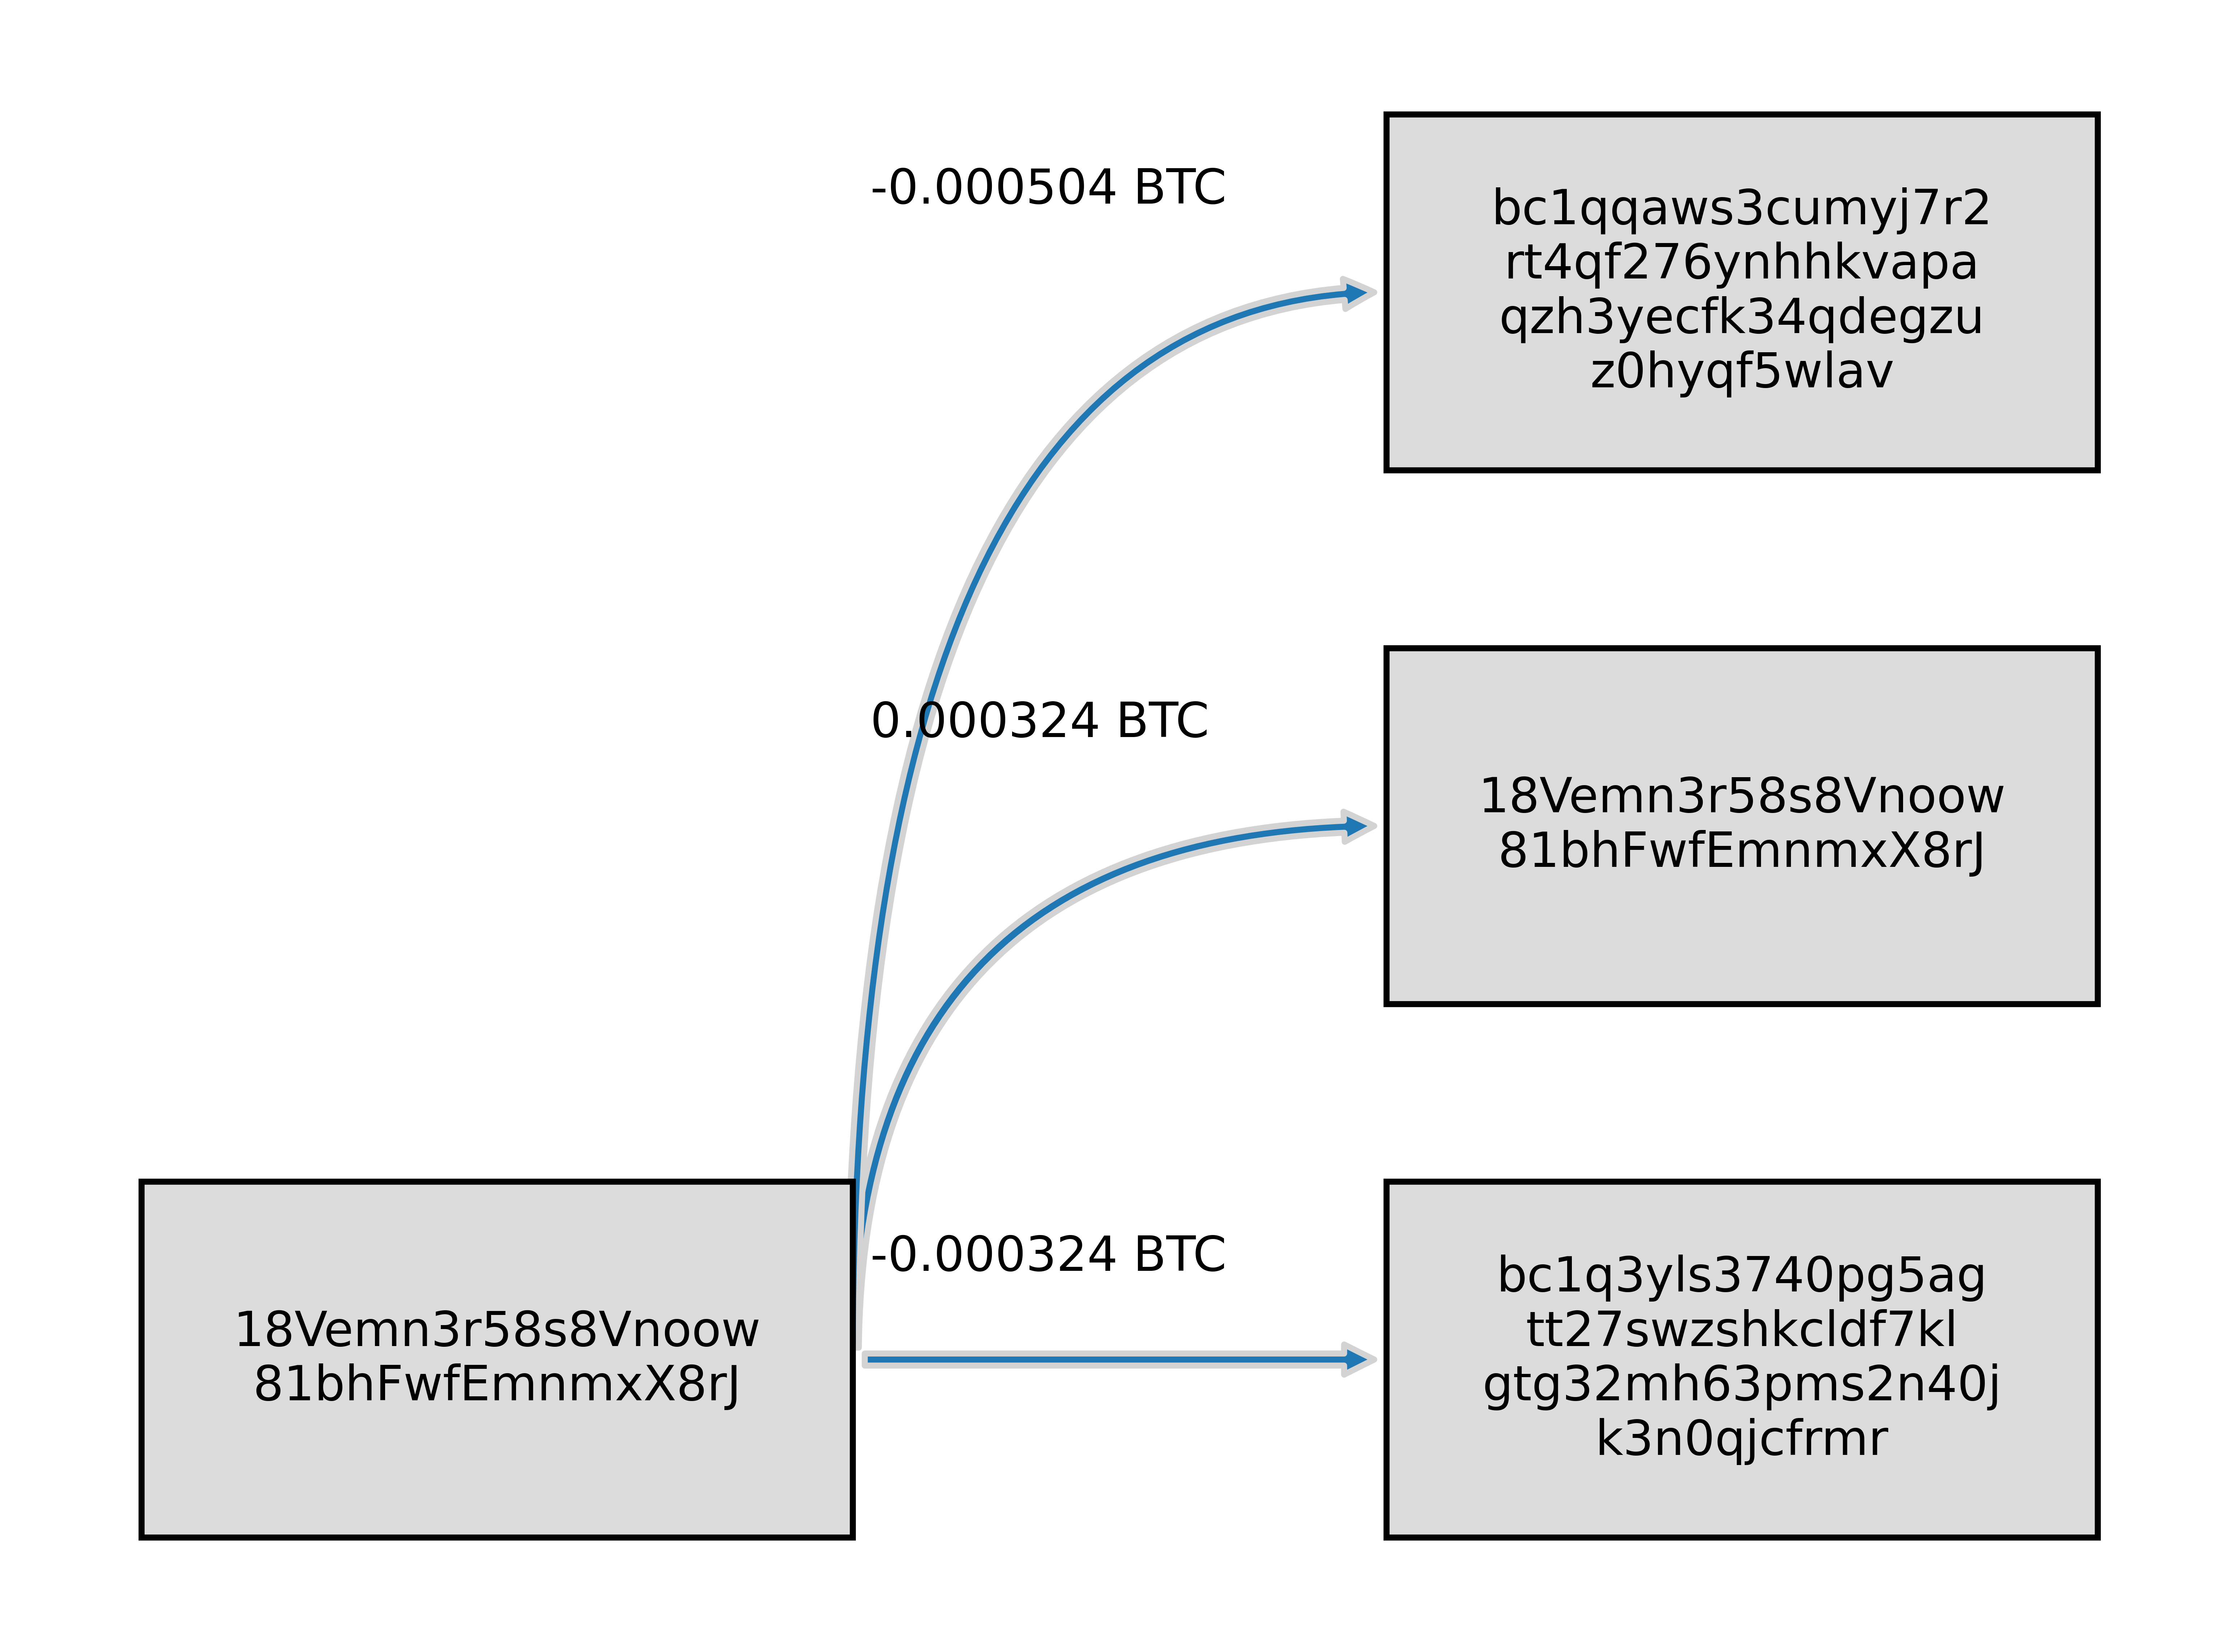

In [21]:
## Test case 3: Different Bitcoin address with 3 outputs
addr = '18Vemn3r58s8Vnoow81bhFwfEmnmxX8rJ'
numoftransactions = 3

dataframe = get_total_transactions(addr)
plot_n_transactions(dataframe,numoftransactions,addr)

In [12]:
from ipywidgets import interact,fixed

## Test case 4: Different Bitcoin address with slider implementation
addr = '18Vemn3r58s8Vnoow81bhFwfEmnmxX8rJ'
numoftransactions = 4

dataframe = get_total_transactions(addr)
interact(plot_n_transactions,dataframe=fixed(dataframe),n_txns=(1,numoftransactions,1),addr = fixed(addr))

Dataframe is set


interactive(children=(IntSlider(value=2, description='n_txns', max=4, min=1), Output()), _dom_classes=('widget…

<function __main__.plot_n_transactions(dataframe, n_txns, addr)>

In [13]:
'''
The following section is for plotting with legends
'''
from matplotlib import pyplot as plt
from matplotlib.patches import FancyArrowPatch
import matplotlib.text as mpl_text

## calculate the fontsize to attend to the increase in number of transactions
def get_fontsize(number):
    fontsize = 5 - (number -1)*0.5
    return max(1, fontsize)

## create an object
class TextObject(object):
    def __init__(self, text, color):
        self.my_text = text
        self.my_color = color
        
## define the object methods
class TextObjectHandler(object):
    def legend_artist(self, legend, orig_handle, fontsize, handlebox):
        x0, y0 = handlebox.xdescent, handlebox.ydescent
        width, height = handlebox.width, handlebox.height
        
        patch = mpl_text.Text(x=0, y=0, text=orig_handle.my_text)
        handlebox.add_artist(patch)
        return patch

## function to iterate the custom legend handlers:
def create_legend(dataframe,n_txns,addr):
    handles = []
    labels = []
    obj = TextObject(str(), 'black')
    handles.append(obj)
    labels.append(f"{1}:  {addr}")
    for i in range(1, n_txns+1):
        obj = TextObject(str(), 'black')
        handles.append(obj)
        labels.append(f"{i+1}:  {dataframe.loc[i-1, 'transactions']+'_'+dataframe.loc[i-1, 'time_of_transaction']}")
        
    plt.legend(handles, labels, bbox_to_anchor=(1.05, 1), loc='upper left', 
            handler_map={obj:TextObjectHandler() for obj in handles},
            fontsize=get_fontsize(n_txns))
    
## improving the plot quality
plt.rcParams['figure.dpi'] = 1200
plt.rcParams['savefig.dpi'] = 1200

## plotting with legend
def plot_n_transactions_legends(dataframe,n_txns,addr): 
    input_circle = plt.Circle((5, 4), radius=0.5, facecolor="gainsboro", edgecolor="black")
    plt.text(5,4,1,horizontalalignment='center',verticalalignment='center',fontsize=get_fontsize(n_txns))
    ax = plt.gca()  
    for n in range(n_txns):
        rect = plt.Circle((12, (n)*3+4), radius = 0.5, facecolor="gainsboro", edgecolor="black")
        arrow = FancyArrowPatch((5, 4), (11.5, 3*(n)+4), edgecolor="lightgray", arrowstyle="simple",mutation_scale=10,connectionstyle="angle3")
        plt.annotate(str(dataframe['amount'][n]/(10**8)) + ' BTC', (9.1, 4.5+3*(n)), fontsize=get_fontsize(n_txns))
        plt.text(12,4+3*(n),(n+2),horizontalalignment='center',verticalalignment='center',fontsize=get_fontsize(n_txns))
        
        ax.add_patch(rect)
        ax.add_patch(arrow)      
        
    create_legend(dataframe,n_txns,addr)
    ax.add_patch(input_circle)
    plt.axis("scaled")
    plt.axis("off")
    plt.show()

Dataframe is set


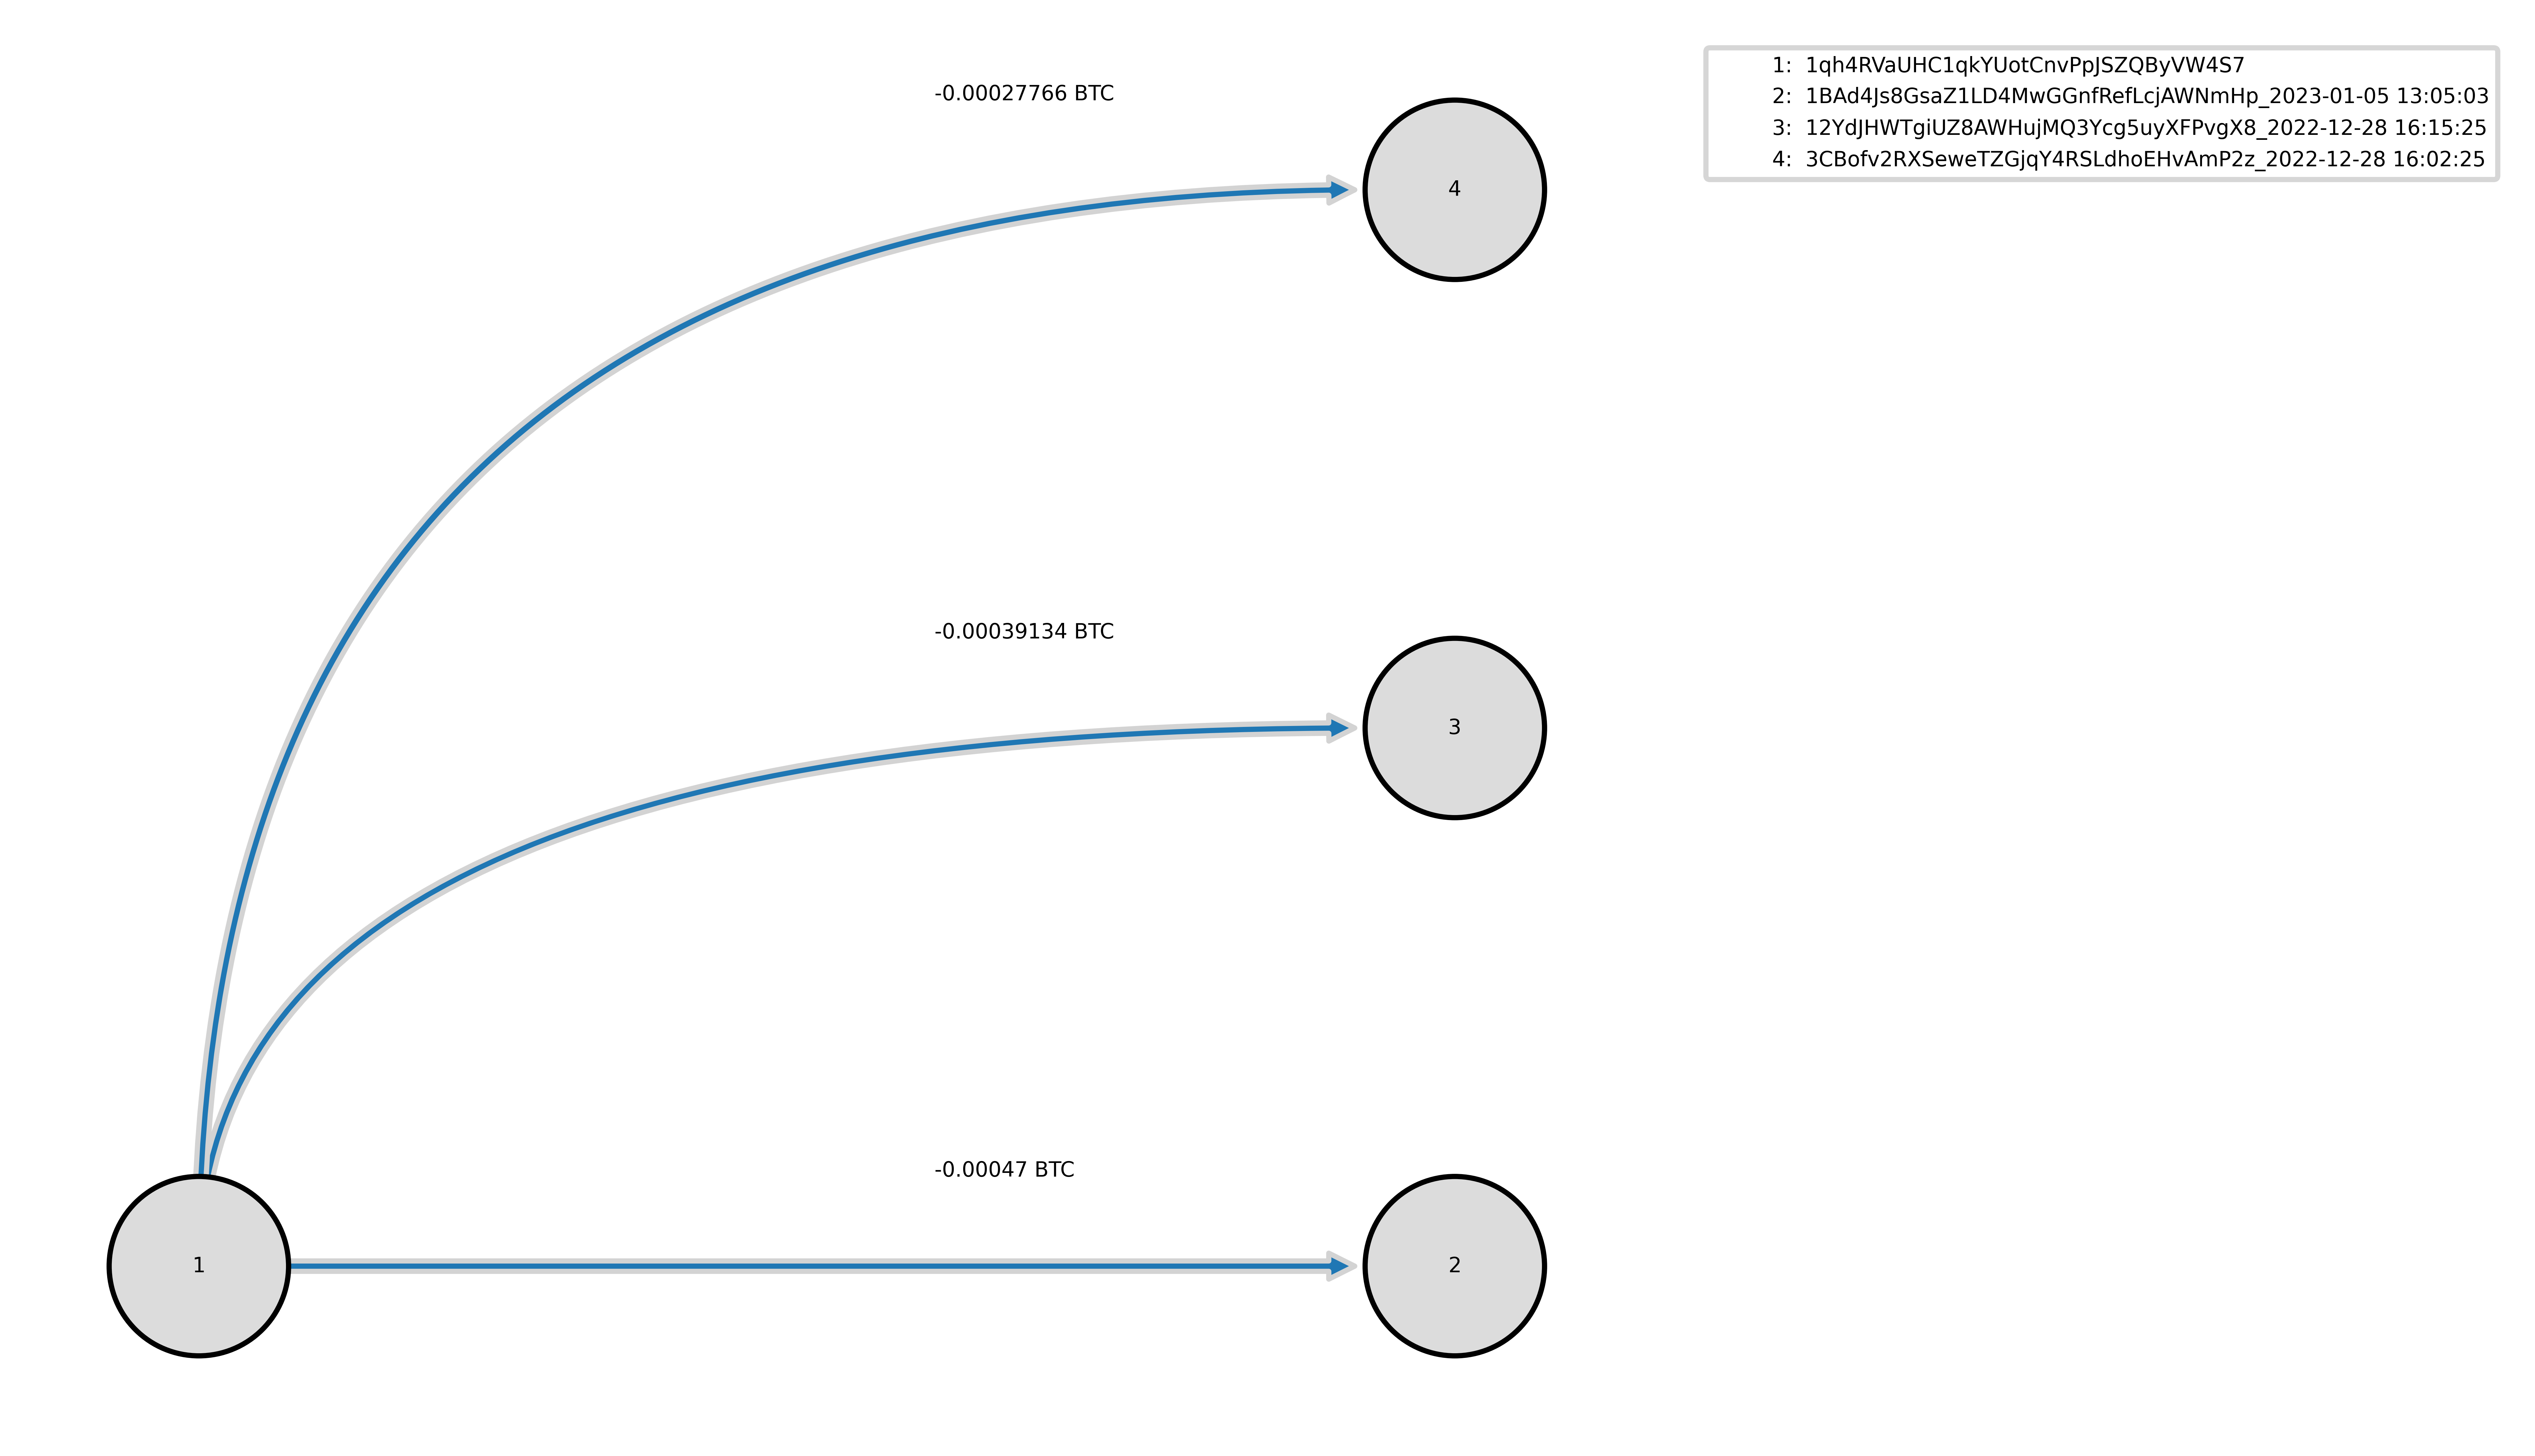

In [3]:
## Test case 1: Bitcoin address with 3 output addresses and amounts
addr = '1qh4RVaUHC1qkYUotCnvPpJSZQByVW4S7'
numoftransactions = 3

dataframe = get_total_transactions(addr)
plot_n_transactions_legends(dataframe,numoftransactions,addr)

Dataframe is set


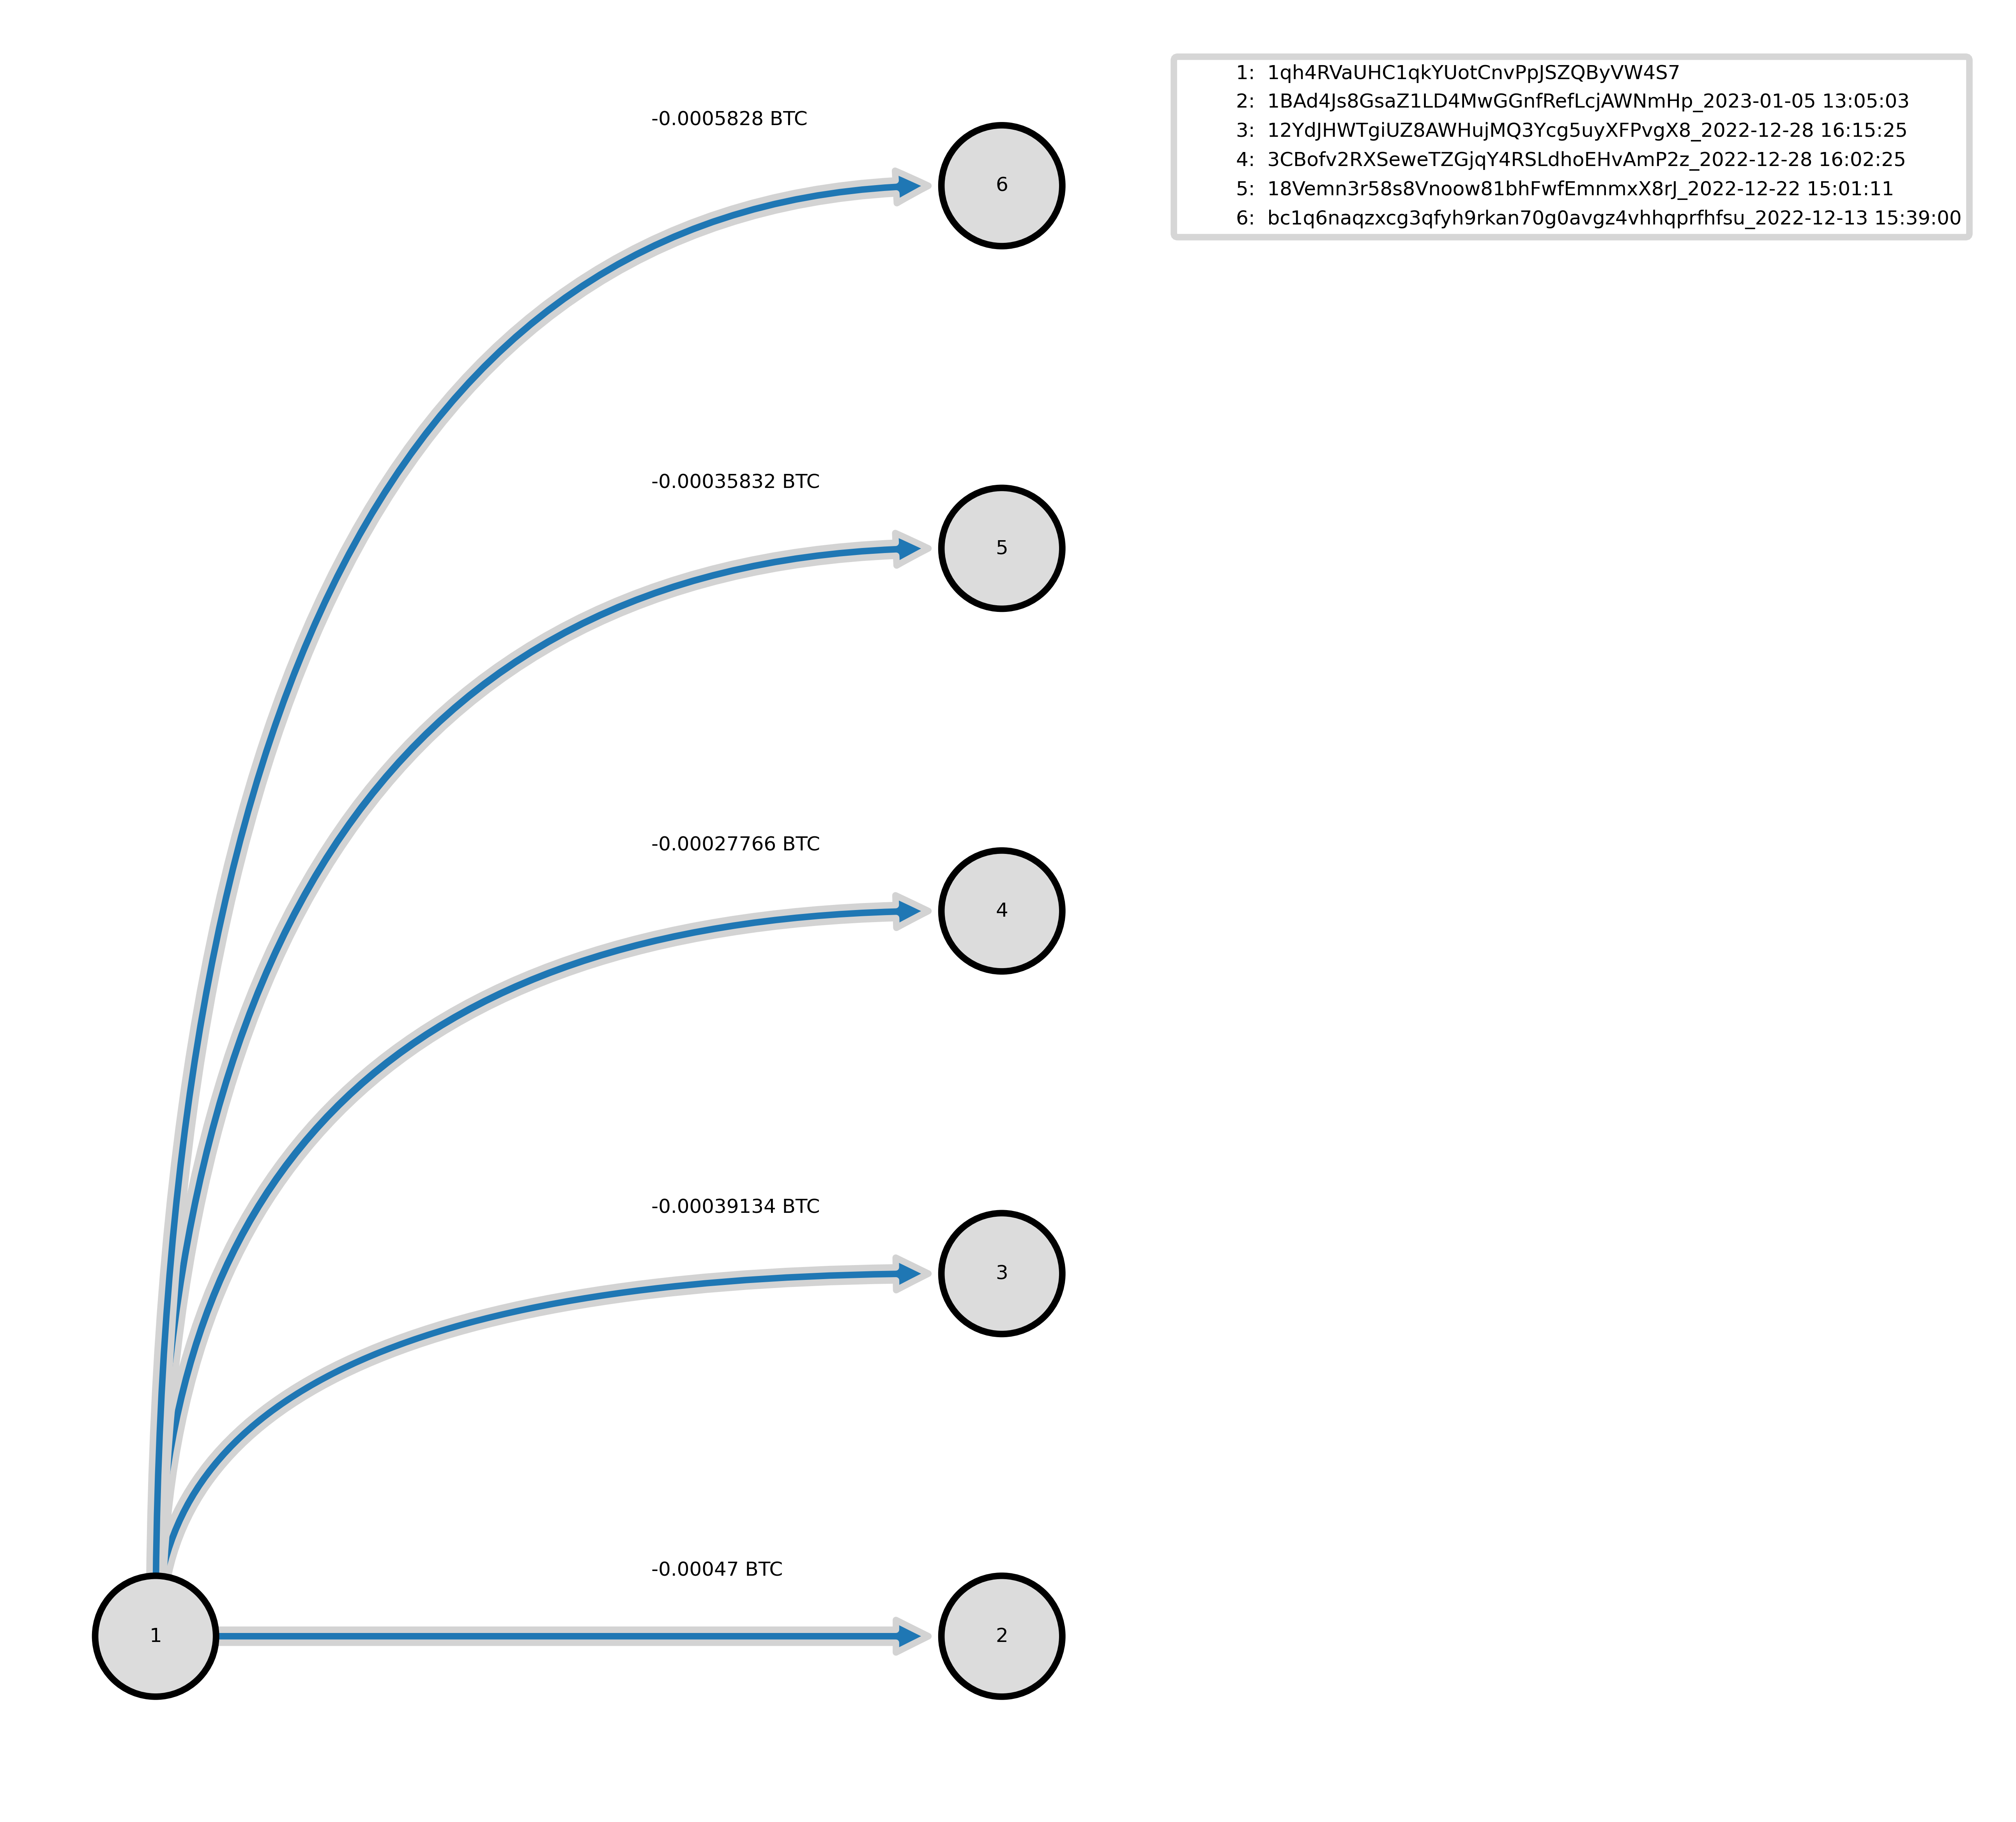

In [4]:
## Test case 2: Bitcoin address with 5 output addresses and amounts
addr = '1qh4RVaUHC1qkYUotCnvPpJSZQByVW4S7'
numoftransactions = 5

dataframe = get_total_transactions(addr)
plot_n_transactions_legends(dataframe,numoftransactions,addr)

Dataframe is set


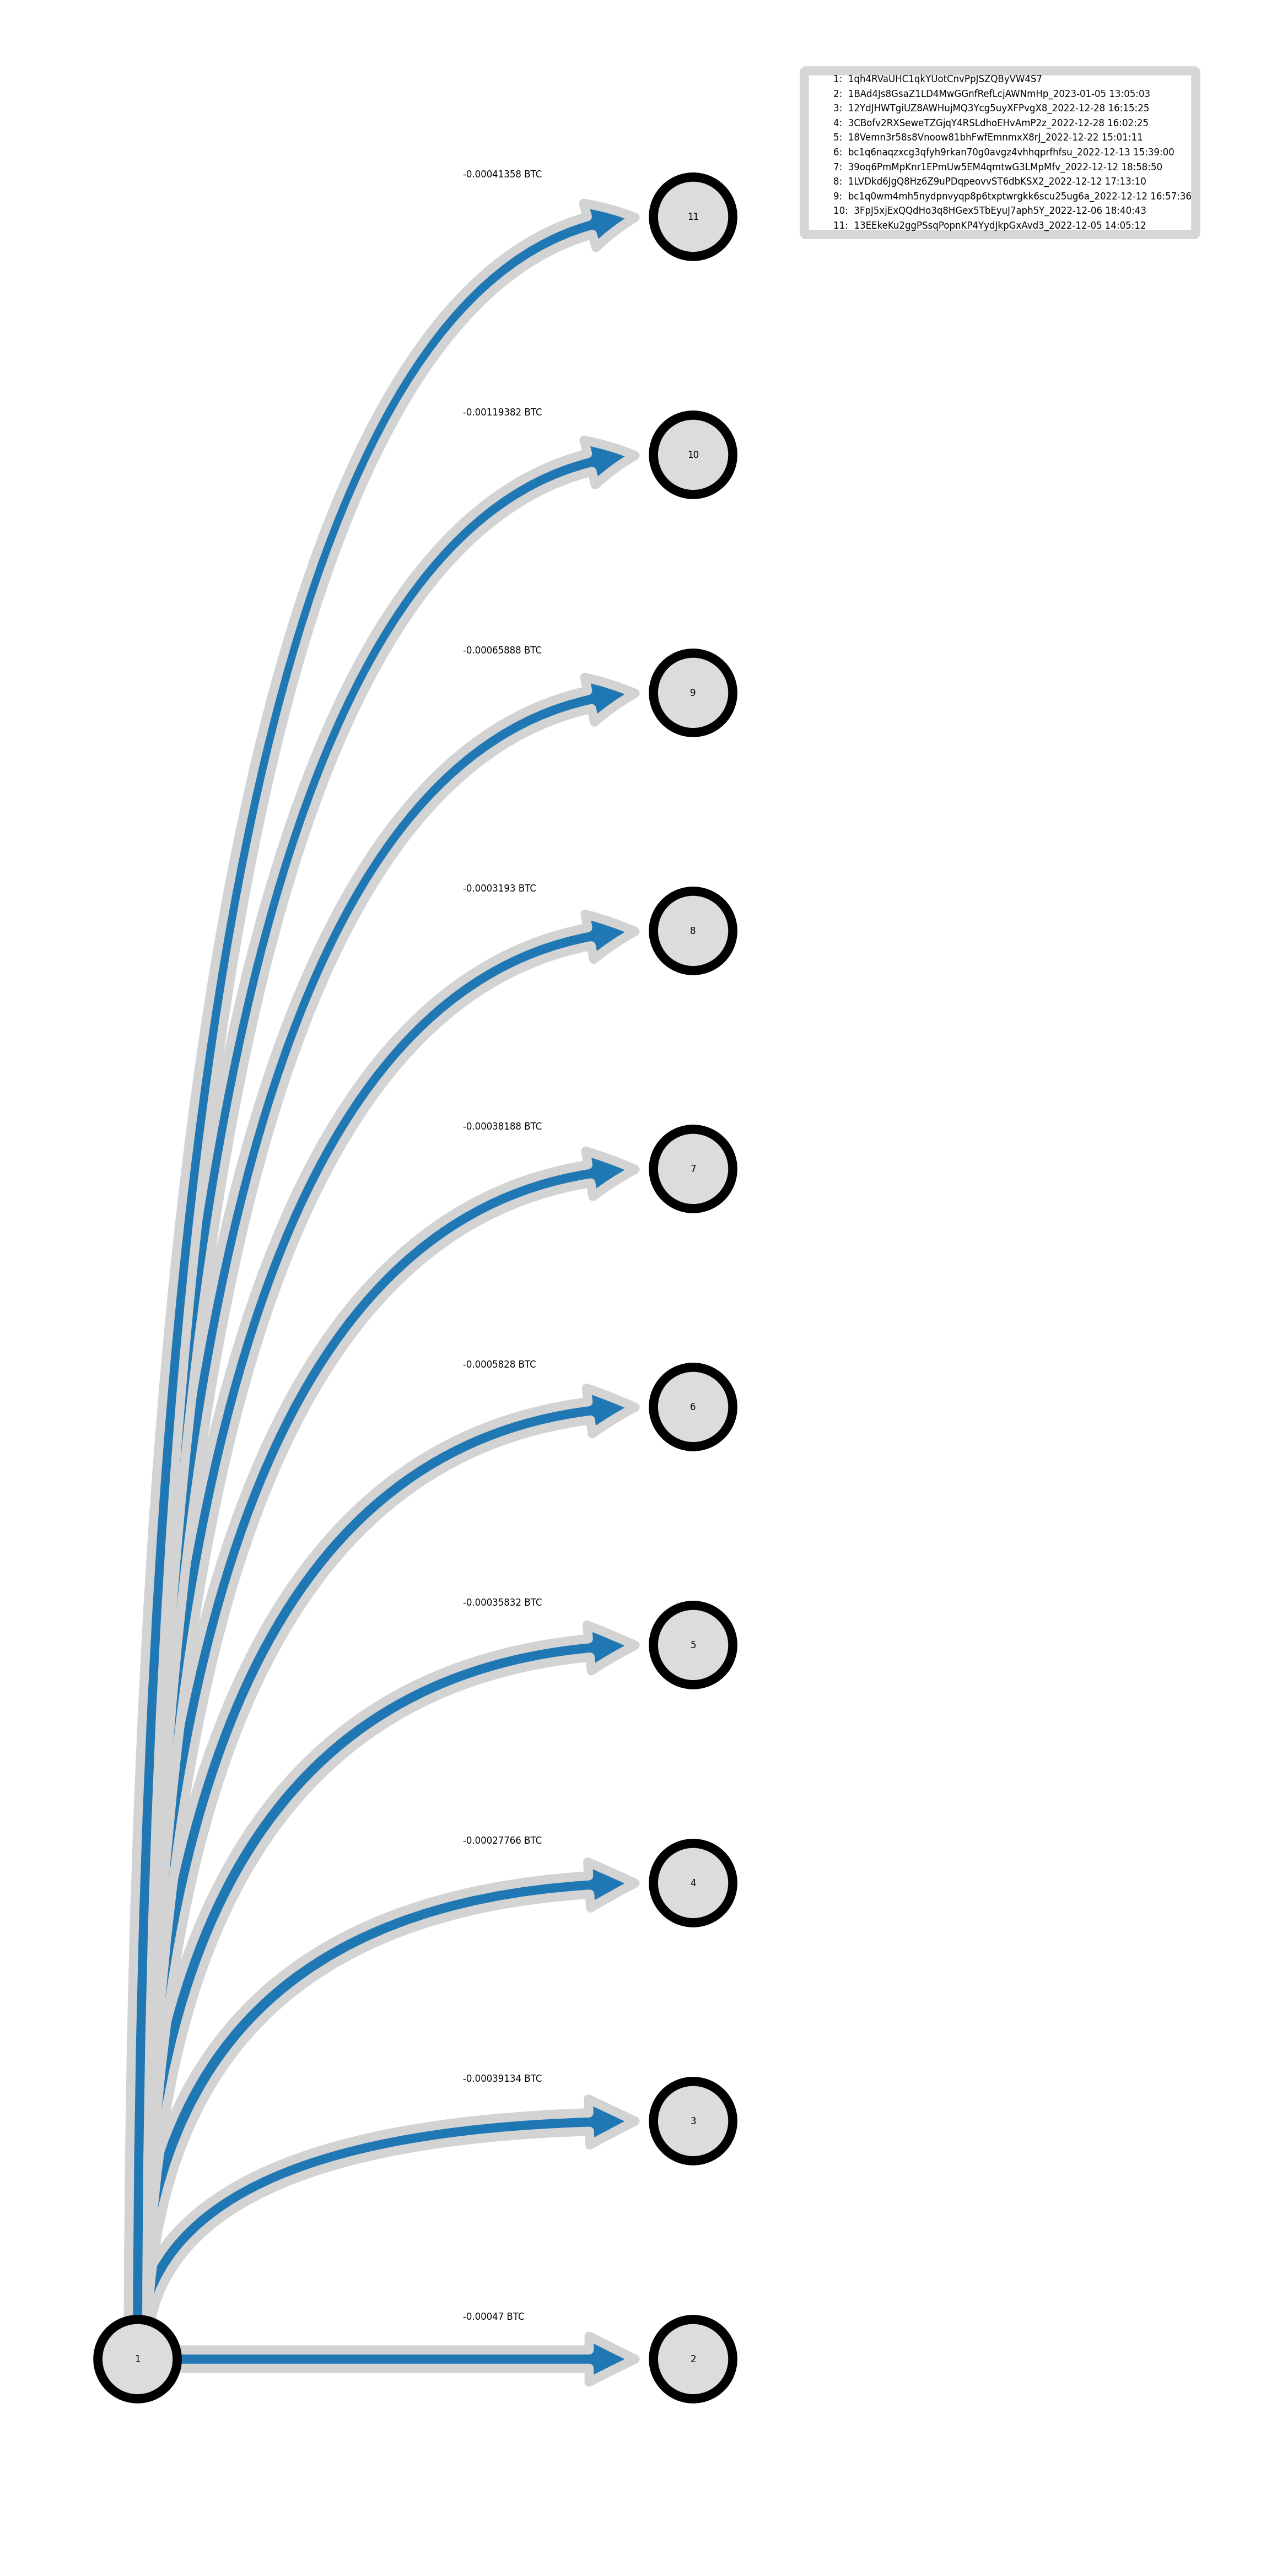

In [5]:
## Test case 3: Bitcoin address with 10 output addresses and amounts
addr = '1qh4RVaUHC1qkYUotCnvPpJSZQByVW4S7'
numoftransactions = 10

dataframe = get_total_transactions(addr)
plot_n_transactions_legends(dataframe,numoftransactions,addr)

In [14]:
from ipywidgets import interact,fixed

## Test case 4: Bitcoin address with slider implementation
addr = '1qh4RVaUHC1qkYUotCnvPpJSZQByVW4S7'
numoftransactions = 10

dataframe = get_total_transactions(addr)
interact(plot_n_transactions_legends,dataframe=fixed(dataframe),n_txns=(1,numoftransactions,1),addr = fixed(addr))

Dataframe is set


interactive(children=(IntSlider(value=5, description='n_txns', max=10, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_n_transactions_legends(dataframe, n_txns, addr)>